<a href="https://colab.research.google.com/github/ddoddii/patent-analysis/blob/main/Proptech_patent_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기, 정의
- patent: real estate 검색 결과
- pat_prop : property + blockchain 검색 결과
- patent_desc = patent['요약'] : real estate 특허 검색 결과의 요약
- patent_cpc : cpc current all
- patent_person: 출원인 

In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [26]:
patent = pd.read_csv("/content/drive/MyDrive/ISL/real estate_wipson.csv", encoding='cp949')

In [27]:
pat_prop = pd.read_csv("/content/drive/MyDrive/ISL/property+blockchain_wipson.csv",encoding='cp949')

In [28]:
patent.columns

Index(['국가코드', 'DB종류', '특허/실용 구분', '문헌종류 코드', '발명의 명칭', '발명의 명칭(제2언어)', '요약',
       '요약(제2언어)', '대표청구항', '대표청구항(제2언어)', '청구항 수', '출원번호', '출원일',
       '번역문제출일(or §371 date)', '공개번호/공표/재공표 ', '공개일', '등록번호', '등록일',
       '발행일[JP,EP,PCT]', '출원인', '특허고객번호(출원인)[KR]', '출원인(제2언어)', '출원인 국적',
       '출원인 주소[KR]', '출원인 수', '출원인 대표명화 코드', '출원인 대표명화 영문명',
       '출원인 대표명화 국문명[KR]', '원문상 출원인[KR]', '출원인 식별기호[JP]', '발명자/고안자',
       '발명자(제2언어)', '발명자/고안자 국적', '발명자 수', '대리인', '대리인번호[KR]', '우선권 번호',
       '우선권 국가', '우선권 주장일', '최우선출원번호', '최우선출원국가', '최우선출원일', '국제 출원번호',
       '국제 출원일', '국제 공개번호', '국제 공개일', '지정국 코드', 'EPC지정국[EP]',
       'Original CPC Main', 'Original CPC All', 'Original IPC Main',
       'Original IPC All', 'Original US Class Main[US]',
       'Original US Class All[US]', 'Original FI[JP]', 'Original F-term[JP]',
       'Original Theme Code [JP]', 'Current CPC Main', 'Current CPC All',
       'Current IPC Main', 'Current IPC All', 'Current US Class Main[US]',
       'Current US Clas

In [29]:
all = pd.concat([patent, pat_prop])

In [30]:
all['출원일'].str[0:4].describe()

count     1753
unique      37
top       2007
freq       109
Name: 출원일, dtype: object

In [31]:
all['출원일'].str[0:4].value_counts()

2007    109
2018     97
2006     92
2004     92
2003     91
2014     91
2019     90
2005     89
2013     88
2001     87
2015     87
2008     83
2020     78
2002     77
2016     73
2017     71
2009     67
2012     67
2011     55
2021     52
2010     50
2000     15
2022     10
1999      8
1992      6
1991      5
1994      4
1996      3
1989      3
1990      3
1997      2
1998      2
1981      2
1995      1
1988      1
1987      1
1985      1
Name: 출원일, dtype: int64

In [32]:
year = all['출원일'].str[0:4].astype('int')

In [33]:
year.apply(lambda x : True if x < 2000 else False)

0     False
1     False
2     False
3     False
4     False
      ...  
72    False
73    False
74    False
75    False
76    False
Name: 출원일, Length: 1753, dtype: bool

In [34]:
len(year[year==True])

0

In [35]:
patent_cpc = patent['Current CPC All'].str.split('|')
patent_cpc

0       [G06Q-0030/0278 ,  G06Q-0040/025 ,  G06Q-0010/...
1          [G06N-0020/00 ,  G06Q-0050/16 ,  G06F-0017/18]
2       [G06Q-0050/167 ,  G06Q-0030/0641 ,  G06Q-0030/...
3       [G06F-0016/29 ,  G06T-0017/05 ,  B64C-0039/024...
4       [H01L-0023/5226 ,  H01L-0024/09 ,  H01L-0024/1...
                              ...                        
1671                  [H03K-0019/0826 ,  H03K-0019/01812]
1672    [H01L-0023/5385 ,  H01L-0023/5382 ,  H01L-0023...
1673                                       [G11C-0007/20]
1674                  [H05K-0001/0289 ,  H01L-2224/49171]
1675    [H01L-0029/0847 ,  H01L-0023/535 ,  H01L-0027/...
Name: Current CPC All, Length: 1676, dtype: object

In [36]:
patent_cpc = pd.DataFrame(patent_cpc)
patent_cpc

,Current CPC All
0,"[G06Q-0030/0278 , G06Q-0040/025 , G06Q-0010/..."
1,"[G06N-0020/00 , G06Q-0050/16 , G06F-0017/18]"
2,"[G06Q-0050/167 , G06Q-0030/0641 , G06Q-0030/..."
3,"[G06F-0016/29 , G06T-0017/05 , B64C-0039/024..."
4,"[H01L-0023/5226 , H01L-0024/09 , H01L-0024/1..."
...,...
1671,"[H03K-0019/0826 , H03K-0019/01812]"
1672,"[H01L-0023/5385 , H01L-0023/5382 , H01L-0023..."
1673,[G11C-0007/20]
1674,"[H05K-0001/0289 , H01L-2224/49171]"


In [37]:
patent_cpc['Current CPC All'].str[:4].head()

0    [G06Q-0030/0278 ,  G06Q-0040/025 ,  G06Q-0010/...
1       [G06N-0020/00 ,  G06Q-0050/16 ,  G06F-0017/18]
2    [G06Q-0050/167 ,  G06Q-0030/0641 ,  G06Q-0030/...
3    [G06F-0016/29 ,  G06T-0017/05 ,  B64C-0039/024...
4    [H01L-0023/5226 ,  H01L-0024/09 ,  H01L-0024/1...
Name: Current CPC All, dtype: object

In [38]:
patent_cpc.describe()

,Current CPC All
count,1675
unique,1404
top,"[G06Q-0040/02 , G06Q-0040/025]"
freq,18


In [39]:
patent_person = patent['출원인']
patent_person.value_counts().head(15)

International Business Machines Corporation    30
INTERNATIONAL BUSINESS MACHINES CORPORATION    11
Carrier Corporation                            10
CoreLogic Solutions, LLC                        9
CARRIER CORPORATION                             9
BANK OF AMERICA CORPORATION                     7
NEC CORPORATION                                 6
Intel Corporation                               6
MasterCard International Incorporated           5
Microsoft Corporation                           5
Texas Instruments Incorporated                  4
Corelogic Solutions, LLC                        4
SONY CORPORATION                                4
Robert PALMER                                   4
JONES LANG LASALLE IP, INC.                     3
Name: 출원인, dtype: int64

In [40]:
patent_desc = patent['요약']

In [41]:
patent_desc = patent_desc.dropna(how='any',axis=0)

In [42]:
patent_desc

0       Techniques are described for computing a risk ...
1       A method for determining that a given real est...
2       This application concerns a web based portal f...
3       There is disclosed a system and process for cr...
4       An embedded multi-die interconnect bridge (EMI...
                              ...                        
1671    The present invention provides an integrated c...
1672    Engineering changes in the wiring between semi...
1673    A CMOS memory cell is disclosed which has a la...
1674    A wafer substrate for integrated circuits (1) ...
1675    The subject invention conserves memory real es...
Name: 요약, Length: 1673, dtype: object

In [43]:
pat_prop_desc = pat_prop['요약']

In [44]:
p = pd.concat([patent_desc,pat_prop_desc] )
p

0     Techniques are described for computing a risk ...
1     A method for determining that a given real est...
2     This application concerns a web based portal f...
3     There is disclosed a system and process for cr...
4     An embedded multi-die interconnect bridge (EMI...
                            ...                        
72    This invention amounts to tools and procedures...
73    A system and methods for managing intellectual...
74    An apparatus, including a user device, provide...
75    A flexible blockchain smart-contract deploymen...
76    A decentralized property system and method all...
Name: 요약, Length: 1750, dtype: object

In [45]:
p = p.drop_duplicates()

In [46]:
p

0     Techniques are described for computing a risk ...
1     A method for determining that a given real est...
2     This application concerns a web based portal f...
3     There is disclosed a system and process for cr...
4     An embedded multi-die interconnect bridge (EMI...
                            ...                        
72    This invention amounts to tools and procedures...
73    A system and methods for managing intellectual...
74    An apparatus, including a user device, provide...
75    A flexible blockchain smart-contract deploymen...
76    A decentralized property system and method all...
Name: 요약, Length: 1730, dtype: object

# 라이브러리 

In [47]:
!pip install tqdm #진행상태를 알려주는 기능 제공

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('maxent_treebank_pos_tagger')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


True

In [49]:
import matplotlib.pyplot as plt
import urllib.request
import nltk

# Text Preprocessing

### 1. Remove punctuations and symbols

In [ ]:
# 정규표현식 사용해서 특수문자 제거
patent_desc = patent_desc.str.replace("[^a-zA-Z]"," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#소문자로 변환
patent_desc = patent_desc.str.lower()

In [ ]:
patent_desc[0]

'techniques are described for computing a risk based assignment  rba  score for a valuation of a target property  and assigning an appraiser to perform the valuation based on the rba score  the techniques may be used to select appraisers for mortgage loan default or origination  the rba score is a numerical value used to estimate a level of complexity of the valuation of the target property in a given time  the level of complexity of the valuation is gauged by valuation accuracy  which is influenced by a level of difficulty to select comparable properties  the disclosed techniques comprise a model configured to assess the complexity of the valuation based on property specific information for the target property and generated neighborhood property information associated with a neighborhood of the target property  the techniques ensure that high complexity valuations are assigned to appraisers and valuation tools identified as being highly accurate '

In [ ]:
patent_desc[1]

'a method for determining that a given real estate record  rer  and at least one other rer of one or more other rers are successive events associated with a common real estate resource  the method comprising  providing one or more statistical distribution functions  sdfs  or machine learning  ml  models  obtaining resource information on resource features that are associated with the one or more real estate resources and rer information on record features that are associated with the given rer and the other rers  calculating a collision probability that the given rer and the at least one other rer are the successive events  based on the resource information  the rer information  and one or more of the sdfs or ml models  and determining  upon the collision probability being greater than or equal to a given probability  that the given rer and the at least one other rer are the successive events '

In [ ]:
#첫번째 행으로 예시
words = patent_desc[0].split()
print(len(words))
words

149


['techniques',
 'are',
 'described',
 'for',
 'computing',
 'a',
 'risk',
 'based',
 'assignment',
 'rba',
 'score',
 'for',
 'a',
 'valuation',
 'of',
 'a',
 'target',
 'property',
 'and',
 'assigning',
 'an',
 'appraiser',
 'to',
 'perform',
 'the',
 'valuation',
 'based',
 'on',
 'the',
 'rba',
 'score',
 'the',
 'techniques',
 'may',
 'be',
 'used',
 'to',
 'select',
 'appraisers',
 'for',
 'mortgage',
 'loan',
 'default',
 'or',
 'origination',
 'the',
 'rba',
 'score',
 'is',
 'a',
 'numerical',
 'value',
 'used',
 'to',
 'estimate',
 'a',
 'level',
 'of',
 'complexity',
 'of',
 'the',
 'valuation',
 'of',
 'the',
 'target',
 'property',
 'in',
 'a',
 'given',
 'time',
 'the',
 'level',
 'of',
 'complexity',
 'of',
 'the',
 'valuation',
 'is',
 'gauged',
 'by',
 'valuation',
 'accuracy',
 'which',
 'is',
 'influenced',
 'by',
 'a',
 'level',
 'of',
 'difficulty',
 'to',
 'select',
 'comparable',
 'properties',
 'the',
 'disclosed',
 'techniques',
 'comprise',
 'a',
 'model',
 'co

In [ ]:
words1= patent_desc[1].split()
print(len(words))
words1

149


['a',
 'method',
 'for',
 'determining',
 'that',
 'a',
 'given',
 'real',
 'estate',
 'record',
 'rer',
 'and',
 'at',
 'least',
 'one',
 'other',
 'rer',
 'of',
 'one',
 'or',
 'more',
 'other',
 'rers',
 'are',
 'successive',
 'events',
 'associated',
 'with',
 'a',
 'common',
 'real',
 'estate',
 'resource',
 'the',
 'method',
 'comprising',
 'providing',
 'one',
 'or',
 'more',
 'statistical',
 'distribution',
 'functions',
 'sdfs',
 'or',
 'machine',
 'learning',
 'ml',
 'models',
 'obtaining',
 'resource',
 'information',
 'on',
 'resource',
 'features',
 'that',
 'are',
 'associated',
 'with',
 'the',
 'one',
 'or',
 'more',
 'real',
 'estate',
 'resources',
 'and',
 'rer',
 'information',
 'on',
 'record',
 'features',
 'that',
 'are',
 'associated',
 'with',
 'the',
 'given',
 'rer',
 'and',
 'the',
 'other',
 'rers',
 'calculating',
 'a',
 'collision',
 'probability',
 'that',
 'the',
 'given',
 'rer',
 'and',
 'the',
 'at',
 'least',
 'one',
 'other',
 'rer',
 'are',
 'the'

###  2. Tokenize

In [93]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tag import pos_tag
nltk.download('omw-1.4')
# from tensorflow.keras.preprocessing.text import text_to_word_sequence
tokenizer = TreebankWordTokenizer()


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
tokenized_data = []
for sentence in patent_desc:
  tokened = tokenizer.tokenize(sentence)
  tokenized_data.append(tokened)

In [ ]:
print(len(tokenized_data))

1673


### 3. Stopwords 제거


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stopwords_list=["'ll","'tis","'twas","'ve","10","39","a",'a',"a's","able","ableabout","about","above","abroad","abst","accordance","according","accordingly","across","act","actually","ad","added","adj","adopted","ae","af","affected","affecting","affects","after","afterwards","ag","again","against","ago","ah","ahead","ai","ain't","aint","al","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","amoungst","amount","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","ao","apart","apparently","appear","appreciate","appropriate","approximately","aq","ar","are","area","areas","aren","aren't","arent","arise","around","arpa","as","aside","ask","asked","asking","asks","associated","at","au","auth","available","aw","away","awfully","az","b","ba","back","backed","backing","backs","backward","backwards","bb","bd","be","became","because","become","becomes","becoming","been","before","beforehand","began","begin","beginning","beginnings","begins","behind","being","beings","believe","below","beside","besides","best","better","between","beyond","bf","bg","bh","bi","big","bill","billion","biol","bj","bm","bn","bo","both","bottom","br","brief","briefly","bs","bt","but","buy","bv","bw","by","bz","c","c'mon","c's","ca","call","came","can","can't","cannot","cant","caption","case","cases","cause","causes","cc","cd","certain","certainly","cf","cg","ch","changes","ci","ck","cl","clear","clearly","click","cm","cmon","cn","co","co.","com","come","comes","computer","con","concerning","consequently","consider","considering","contain","containing","contains","copy","corresponding","could","could've","couldn","couldn't","couldnt","course","cr","cry","cs","cu","currently","cv","cx","cy","cz","d","dare","daren't","darent","date","de","dear","definitely","describe","described","despite","detail","did","didn","didn't","didnt","differ","different","differently","directly","dj","dk","dm","do","does","doesn","doesn't","doesnt","doing","don","don't","done","dont","doubtful","down","downed","downing","downs","downwards","due","during","dz","e","each","early","ec","ed","edu","ee","effect","eg","eh","eight","eighty","either","eleven","else","elsewhere","empty","end","ended","ending","ends","enough","entirely","er","es","especially","et","et-al","etc","even","evenly","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","face","faces","fact","facts","fairly","far","farther","felt","few","fewer","ff","fi","fifteen","fifth","fifty","fify","fill","find","finds","fire","first","five","fix","fj","fk","fm","fo","followed","following","follows","for","forever","former","formerly","forth","forty","forward","found","four","fr","free","from","front","full","fully","further","furthered","furthering","furthermore","furthers","fx","g","ga","gave","gb","gd","ge","general","generally","get","gets","getting","gf","gg","gh","gi","give","given","gives","giving","gl","gm","gmt","gn","go","goes","going","gone","good","goods","got","gotten","gov","gp","gq","gr","great","greater","greatest","greetings","group","grouped","grouping","groups","gs","gt","gu","gw","gy","h","had","hadn't","hadnt","half","happens","hardly","has","hasn","hasn't","hasnt","have","haven","haven't","havent","having","he","he'd","he'll","he's","hed","hell","hello","help","hence","her","here","here's","hereafter","hereby","herein","heres","hereupon","hers","herself","herse”","hes","hi","hid","high","higher","highest","him","himself","himse”","his","hither","hk","hm","hn","home","homepage","hopefully","how","how'd","how'll","how's","howbeit","however","hr","ht","htm","html","http","hu","hundred","i","i'd","i'll","i'm","i've","i.e.","id","ie","if","ignored","ii","il","ill","im","immediate","immediately","importance","important","in","inasmuch","inc","inc.","indeed","index","indicate","indicated","indicates","information","inner","inside","insofar","instead","int","interest","interested","interesting","interests","into","invention","inward","io","iq","ir","is","isn","isn't","isnt","it","it'd","it'll","it's","itd","itll","its","itself","itse”","ive","j","je","jm","jo","join","jp","just","k","ke","keep","keeps","kept","keys","kg","kh","ki","kind","km","kn","knew","know","known","knows","kp","kr","kw","ky","kz","l","la","large","largely","last","lately","later","latest","latter","latterly","lb","lc","least","length","less","lest","let","let's","lets","li","like","liked","likely","likewise","line","little","lk","ll","long","longer","longest","look","looking","looks","low","lower","lr","ls","lt","ltd","lu","lv","ly","m","ma","made","mainly","make","makes","making","man","many","may","maybe","mayn't","maynt","mc","md","me","mean","means","meantime","meanwhile","member","members","men","merely","mg","mh","microsoft","might","might've","mightn't","mightnt","mil","mill","million","mine","minus","miss","mk","ml","mm","mn","mo","more","moreover","most","mostly","move","mp","mq","mr","mrs","ms","msie","mt","mu","much","mug","must","must've","mustn't","mustnt","mv","mw","mx","my","myself","myse”","mz","n","na","name","namely","nay","nc","nd","ne","near","nearly","necessarily","necessary","need","needed","needing","needn't","neednt","needs","neither","net","netscape","never","neverf","neverless","nevertheless","new","newer","newest","next","nf","ng","ni","nine","ninety","nl","no","no-one","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","notwithstanding","novel","now","nowhere","np","nr","nu","null","number","numbers","nz","o","obtain","obtained","obviously","of","off","often","oh","ok","okay","old","older","oldest","om","omitted","on","once","one","one's","ones","only","onto","open","opened","opening","opens","opposite","or","ord","order","ordered","ordering","orders","org","other","others","otherwise","ought","oughtn't","oughtnt","our","ours","ourselves","out","outside","over","overall","owing","own","p","pa","page","pages","part","parted","particular","particularly","parting","parts","past","pe","per","perhaps","pf","pg","ph","pk","pl","place","placed","places","please","plus","pm","pmid","pn","point","pointed","pointing","points","poorly","possible","possibly","potentially","pp","pr","predominantly","present","presented","presenting","presents","presumably","previously","primarily","probably","problem","problems","promptly","proud","provided","provides","pt","put","puts","pw","py","q","qa","que","quickly","quite","qv","r","ran","rather","rd","re","readily","really","reasonably","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","reserved","respectively","resulted","resulting","results","right","ring","ro","room","rooms","round","ru","run","rw","s","sa","said","same","saw","say","saying","says","sb","sc","sd","se","sec","second","secondly","seconds","section","see","seeing","seem","seemed","seeming","seems","seen","sees","self","selves","sensible","sent","serious","seriously","seven","seventy","several","sg","sh","shall","shan't","shant","she","she'd","she'll","she's","shed","shell","shes","should","should've","shouldn","shouldn't","shouldnt","show","showed","showing","shown","showns","shows","si","side","sides","significant","significantly","similar","similarly","since","sincere","site","six","sixty","sj","sk","sl","slightly","sm","small","smaller","smallest","sn","so","some","somebody","someday","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","sr","st","state","states","still","stop","strongly","su","sub","substantially","successfully","such","sufficiently","suggest","sup","sure","sv","sy","system","sz","t","t's","take","taken","taking","tc","td","tell","ten","tends","test","text","tf","tg","th","than","thank","thanks","thanx","that","that'll","that's","that've","thatll","thats","thatve","the","their","theirs","them","themselves","then","thence","there","there'd","there'll","there're","there's","there've","thereafter","thereby","thered","therefore","therein","therell","thereof","therere","theres","thereto","thereupon","thereve","these","they","they'd","they'll","they're","they've","theyd","theyll","theyre","theyve","thick","thin","thing","things","think","thinks","third","thirty","this","thorough","thoroughly","those","thou","though","thoughh","thought","thoughts","thousand","three","throug","through","throughout","thru","thus","til","till","tip","tis","tj","tk","tm","tn","to","today","together","too","took","top","toward","towards","tp","tr","tried","tries","trillion","truly","try","trying","ts","tt","turn","turned","turning","turns","tv","tw","twas","twelve","twenty","twice","two","tz","u","ua","ug","uk","um","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","ups","upwards","us","use","used","useful","usefully","usefulness","uses","using","usually","uucp","uy","uz","v","va","value","various","vc","ve","versus","very","vg","vi","via","viz","vn","vol","vols","vs","vu","w","want","wanted","wanting","wants","was","wasn","wasn't","wasnt","way","ways","we","we'd","we'll","we're","we've","web","webpage","website","wed","welcome","well","wells","went","were","weren","weren't","werent","weve","wf","what","what'd","what'll","what's","what've","whatever","whatll","whats","whatve","when","when'd","when'll","when's","whence","whenever","where","where'd","where'll","where's","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","which","whichever","while","whilst","whim","whither","who","who'd","who'll","who's","whod","whoever","whole","wholl","whom","whomever","whos","whose","why","why'd","why'll","why's","widely","width","will","willing","wish","with","within","without","won","won't","wonder","wont","words","work","worked","working","works","world","would","would've","wouldn","wouldn't","wouldnt","ws","www","x","y","ye","year","years","yes","yet","you","you'd","you'll","you're","you've","youd","youll","young","younger","youngest","your","youre","yours","yourself","yourselves","youve","yt","yu","z","za","zero","zm","zr",
'based']

In [ ]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in set(stopwords_list)]
print(len(words))
words

73


['techniques',
 'computing',
 'risk',
 'assignment',
 'rba',
 'score',
 'valuation',
 'target',
 'property',
 'assigning',
 'appraiser',
 'perform',
 'valuation',
 'rba',
 'score',
 'techniques',
 'select',
 'appraisers',
 'mortgage',
 'loan',
 'default',
 'origination',
 'rba',
 'score',
 'numerical',
 'estimate',
 'level',
 'complexity',
 'valuation',
 'target',
 'property',
 'time',
 'level',
 'complexity',
 'valuation',
 'gauged',
 'valuation',
 'accuracy',
 'influenced',
 'level',
 'difficulty',
 'select',
 'comparable',
 'properties',
 'disclosed',
 'techniques',
 'comprise',
 'model',
 'configured',
 'assess',
 'complexity',
 'valuation',
 'property',
 'specific',
 'target',
 'property',
 'generated',
 'neighborhood',
 'property',
 'neighborhood',
 'target',
 'property',
 'techniques',
 'ensure',
 'complexity',
 'valuations',
 'assigned',
 'appraisers',
 'valuation',
 'tools',
 'identified',
 'highly',
 'accurate']

In [ ]:
words1 = [w for w in words1 if not w in set(stopwords_list)]
print(len(words1))
words1

56


['method',
 'determining',
 'real',
 'estate',
 'record',
 'rer',
 'rer',
 'rers',
 'successive',
 'events',
 'common',
 'real',
 'estate',
 'resource',
 'method',
 'comprising',
 'providing',
 'statistical',
 'distribution',
 'functions',
 'sdfs',
 'machine',
 'learning',
 'models',
 'obtaining',
 'resource',
 'resource',
 'features',
 'real',
 'estate',
 'resources',
 'rer',
 'record',
 'features',
 'rer',
 'rers',
 'calculating',
 'collision',
 'probability',
 'rer',
 'rer',
 'successive',
 'events',
 'resource',
 'rer',
 'sdfs',
 'models',
 'determining',
 'collision',
 'probability',
 'equal',
 'probability',
 'rer',
 'rer',
 'successive',
 'events']

### Lemmatization 음소표기법

언어학에서 음소 표기법 (또는 lemmatization)은 단어의 보조 정리 또는 사전 형식에 의해 식별되는 단일 항목으로 분석 될 수 있도록 굴절 된 형태의 단어를 그룹화하는 과정이다. 
예를 들어 동음이의어가 문맥에 따라 다른 의미를 갖는데 
<pre>
1) *배*가 맛있다. 
2) *배*를 타는 것이 재미있다. 
3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다.
</pre>
위에 있는 3개의 문장에 있는 "배"는 모두 다른 의미를 갖는다. <br/>
레마타이제이션은 이때 앞뒤 문맥을 보고 단어의 의미를 식별하는 것이다.
영어에서 meet는 meeting으로 쓰였을 때 회의를 뜻하지만 meet 일 때는 만나다는 뜻을 갖는데 그 단어가 명사로 쓰였는지 동사로 쓰였는지에 따라 적합한 의미를 갖도록 추출하는 것이다.

* 참고 : 
    - [Stemming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)
    - [Lemmatisation - Wikipedia](https://en.wikipedia.org/wiki/Lemmatisation)

In [ ]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

words_lm = [lm.lemmatize(w) for w in words]
set(words_lm)

{'accuracy',
 'accurate',
 'appraiser',
 'ass',
 'assigned',
 'assigning',
 'assignment',
 'comparable',
 'complexity',
 'comprise',
 'computing',
 'configured',
 'default',
 'difficulty',
 'disclosed',
 'ensure',
 'estimate',
 'gauged',
 'generated',
 'highly',
 'identified',
 'influenced',
 'level',
 'loan',
 'model',
 'mortgage',
 'neighborhood',
 'numerical',
 'origination',
 'perform',
 'property',
 'rba',
 'risk',
 'score',
 'select',
 'specific',
 'target',
 'technique',
 'time',
 'tool',
 'valuation'}

In [ ]:
from nltk.tag import pos_tag
tagged_list = pos_tag((words_lm))
tagged_list

[('technique', 'NN'),
 ('computing', 'VBG'),
 ('risk', 'NN'),
 ('assignment', 'NN'),
 ('rba', 'NN'),
 ('score', 'NN'),
 ('valuation', 'NN'),
 ('target', 'NN'),
 ('property', 'NN'),
 ('assigning', 'VBG'),
 ('appraiser', 'NN'),
 ('perform', 'NN'),
 ('valuation', 'NN'),
 ('rba', 'VBZ'),
 ('score', 'NN'),
 ('technique', 'NN'),
 ('select', 'VBP'),
 ('appraiser', 'JJR'),
 ('mortgage', 'NN'),
 ('loan', 'NN'),
 ('default', 'NN'),
 ('origination', 'NN'),
 ('rba', 'NN'),
 ('score', 'RB'),
 ('numerical', 'JJ'),
 ('estimate', 'NN'),
 ('level', 'NN'),
 ('complexity', 'NN'),
 ('valuation', 'NN'),
 ('target', 'NN'),
 ('property', 'NN'),
 ('time', 'NN'),
 ('level', 'NN'),
 ('complexity', 'NN'),
 ('valuation', 'NN'),
 ('gauged', 'VBD'),
 ('valuation', 'NN'),
 ('accuracy', 'NN'),
 ('influenced', 'VBD'),
 ('level', 'NN'),
 ('difficulty', 'NN'),
 ('select', 'VBP'),
 ('comparable', 'JJ'),
 ('property', 'NN'),
 ('disclosed', 'VBD'),
 ('technique', 'JJ'),
 ('comprise', 'NN'),
 ('model', 'NN'),
 ('configured'

In [ ]:
# patent_desc[1] 에 대한 것 
tagged_list_1 = pos_tag((words1))
tagged_list_1

[('method', 'NN'),
 ('determining', 'VBG'),
 ('real', 'JJ'),
 ('estate', 'NN'),
 ('record', 'NN'),
 ('rer', 'NN'),
 ('rer', 'NN'),
 ('rers', 'NNS'),
 ('successive', 'JJ'),
 ('events', 'NNS'),
 ('common', 'JJ'),
 ('real', 'JJ'),
 ('estate', 'NN'),
 ('resource', 'NN'),
 ('method', 'NN'),
 ('comprising', 'VBG'),
 ('providing', 'VBG'),
 ('statistical', 'JJ'),
 ('distribution', 'NN'),
 ('functions', 'NNS'),
 ('sdfs', 'VBP'),
 ('machine', 'NN'),
 ('learning', 'NN'),
 ('models', 'NNS'),
 ('obtaining', 'VBG'),
 ('resource', 'NN'),
 ('resource', 'NN'),
 ('features', 'NNS'),
 ('real', 'JJ'),
 ('estate', 'NN'),
 ('resources', 'NNS'),
 ('rer', 'NN'),
 ('record', 'NN'),
 ('features', 'VBZ'),
 ('rer', 'JJR'),
 ('rers', 'NNS'),
 ('calculating', 'VBG'),
 ('collision', 'NN'),
 ('probability', 'NN'),
 ('rer', 'NN'),
 ('rer', 'NN'),
 ('successive', 'JJ'),
 ('events', 'NNS'),
 ('resource', 'VBP'),
 ('rer', 'NN'),
 ('sdfs', 'NN'),
 ('models', 'NNS'),
 ('determining', 'VBG'),
 ('collision', 'NN'),
 ('probab

In [ ]:
nouns_list1 = [t[0] for t in tagged_list_1 if t[1] == 'NN'or 'JJ']
nouns_list1

['method',
 'determining',
 'real',
 'estate',
 'record',
 'rer',
 'rer',
 'rers',
 'successive',
 'events',
 'common',
 'real',
 'estate',
 'resource',
 'method',
 'comprising',
 'providing',
 'statistical',
 'distribution',
 'functions',
 'sdfs',
 'machine',
 'learning',
 'models',
 'obtaining',
 'resource',
 'resource',
 'features',
 'real',
 'estate',
 'resources',
 'rer',
 'record',
 'features',
 'rer',
 'rers',
 'calculating',
 'collision',
 'probability',
 'rer',
 'rer',
 'successive',
 'events',
 'resource',
 'rer',
 'sdfs',
 'models',
 'determining',
 'collision',
 'probability',
 'equal',
 'probability',
 'rer',
 'rer',
 'successive',
 'events']

In [ ]:
nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
nouns_list

['technique',
 'risk',
 'assignment',
 'rba',
 'score',
 'valuation',
 'target',
 'property',
 'appraiser',
 'perform',
 'valuation',
 'score',
 'technique',
 'mortgage',
 'loan',
 'default',
 'origination',
 'rba',
 'estimate',
 'level',
 'complexity',
 'valuation',
 'target',
 'property',
 'time',
 'level',
 'complexity',
 'valuation',
 'valuation',
 'accuracy',
 'level',
 'difficulty',
 'property',
 'comprise',
 'model',
 'complexity',
 'valuation',
 'property',
 'target',
 'property',
 'property',
 'neighborhood',
 'target',
 'property',
 'technique',
 'complexity',
 'valuation',
 'valuation',
 'tool']

# 문자열 처리 함수 정의

In [50]:
stopwords_list=["'ll","'tis","'twas","'ve","10","39","a",'a',"a's","able","ableabout","about","above","abroad","abst","accordance","according","accordingly","across","act","actually","ad","added","adj","adopted","ae","af","affected","affecting","affects","after","afterwards","ag","again","against","ago","ah","ahead","ai","ain't","aint","al","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","amoungst","amount","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","ao","apart","apparently","appear","appreciate","appropriate","approximately","aq","ar","are","area","areas","aren","aren't","arent","arise","around","arpa","as","aside","ask","asked","asking","asks","associated","at","au","auth","available","aw","away","awfully","az","b","ba","back","backed","backing","backs","backward","backwards","bb","bd","be","became","because","become","becomes","becoming","been","before","beforehand","began","begin","beginning","beginnings","begins","behind","being","beings","believe","below","beside","besides","best","better","between","beyond","bf","bg","bh","bi","big","bill","billion","biol","bj","bm","bn","bo","both","bottom","br","brief","briefly","bs","bt","but","buy","bv","bw","by","bz","c","c'mon","c's","ca","call","came","can","can't","cannot","cant","caption","case","cases","cause","causes","cc","cd","certain","certainly","cf","cg","ch","changes","ci","ck","cl","clear","clearly","click","cm","cmon","cn","co","co.","com","come","comes","computer","con","concerning","consequently","consider","considering","contain","containing","contains","copy","corresponding","could","could've","couldn","couldn't","couldnt","course","cr","cry","cs","cu","currently","cv","cx","cy","cz","d","dare","daren't","darent","date","de","dear","definitely","describe","described","despite","detail","did","didn","didn't","didnt","differ","different","differently","directly","dj","dk","dm","do","does","doesn","doesn't","doesnt","doing","don","don't","done","dont","doubtful","down","downed","downing","downs","downwards","due","during","dz","e","each","early","ec","ed","edu","ee","effect","eg","eh","eight","eighty","either","eleven","else","elsewhere","empty","end","ended","ending","ends","enough","entirely","er","es","especially","et","et-al","etc","even","evenly","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","face","faces","fact","facts","fairly","far","farther","felt","few","fewer","ff","fi","fifteen","fifth","fifty","fify","fill","find","finds","fire","first","five","fix","fj","fk","fm","fo","followed","following","follows","for","forever","former","formerly","forth","forty","forward","found","four","fr","free","from","front","full","fully","further","furthered","furthering","furthermore","furthers","fx","g","ga","gave","gb","gd","ge","general","generally","get","gets","getting","gf","gg","gh","gi","give","given","gives","giving","gl","gm","gmt","gn","go","goes","going","gone","good","goods","got","gotten","gov","gp","gq","gr","great","greater","greatest","greetings","group","grouped","grouping","groups","gs","gt","gu","gw","gy","h","had","hadn't","hadnt","half","happens","hardly","has","hasn","hasn't","hasnt","have","haven","haven't","havent","having","he","he'd","he'll","he's","hed","hell","hello","help","hence","her","here","here's","hereafter","hereby","herein","heres","hereupon","hers","herself","herse”","hes","hi","hid","high","higher","highest","him","himself","himse”","his","hither","hk","hm","hn","home","homepage","hopefully","how","how'd","how'll","how's","howbeit","however","hr","ht","htm","html","http","hu","hundred","i","i'd","i'll","i'm","i've","i.e.","id","ie","if","ignored","ii","il","ill","im","immediate","immediately","importance","important","in","inasmuch","inc","inc.","indeed","index","indicate","indicated","indicates","information","inner","inside","insofar","instead","int","interest","interested","interesting","interests","into","invention","inward","io","iq","ir","is","isn","isn't","isnt","it","it'd","it'll","it's","itd","itll","its","itself","itse”","ive","j","je","jm","jo","join","jp","just","k","ke","keep","keeps","kept","keys","kg","kh","ki","kind","km","kn","knew","know","known","knows","kp","kr","kw","ky","kz","l","la","large","largely","last","lately","later","latest","latter","latterly","lb","lc","least","length","less","lest","let","let's","lets","li","like","liked","likely","likewise","line","little","lk","ll","long","longer","longest","look","looking","looks","low","lower","lr","ls","lt","ltd","lu","lv","ly","m","ma","made","mainly","make","makes","making","man","many","may","maybe","mayn't","maynt","mc","md","me","mean","means","meantime","meanwhile","member","members","men","merely","mg","mh","microsoft","might","might've","mightn't","mightnt","mil","mill","million","mine","minus","miss","mk","ml","mm","mn","mo","more","moreover","most","mostly","move","mp","mq","mr","mrs","ms","msie","mt","mu","much","mug","must","must've","mustn't","mustnt","mv","mw","mx","my","myself","myse”","mz","n","na","name","namely","nay","nc","nd","ne","near","nearly","necessarily","necessary","need","needed","needing","needn't","neednt","needs","neither","net","netscape","never","neverf","neverless","nevertheless","new","newer","newest","next","nf","ng","ni","nine","ninety","nl","no","no-one","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","notwithstanding","novel","now","nowhere","np","nr","nu","null","number","numbers","nz","o","obtain","obtained","obviously","of","off","often","oh","ok","okay","old","older","oldest","om","omitted","on","once","one","one's","ones","only","onto","open","opened","opening","opens","opposite","or","ord","order","ordered","ordering","orders","org","other","others","otherwise","ought","oughtn't","oughtnt","our","ours","ourselves","out","outside","over","overall","owing","own","p","pa","page","pages","part","parted","particular","particularly","parting","parts","past","pe","per","perhaps","pf","pg","ph","pk","pl","place","placed","places","please","plus","pm","pmid","pn","point","pointed","pointing","points","poorly","possible","possibly","potentially","pp","pr","predominantly","present","presented","presenting","presents","presumably","previously","primarily","probably","problem","problems","promptly","proud","provided","provides","pt","put","puts","pw","py","q","qa","que","quickly","quite","qv","r","ran","rather","rd","re","readily","really","reasonably","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","reserved","respectively","resulted","resulting","results","right","ring","ro","room","rooms","round","ru","run","rw","s","sa","said","same","saw","say","saying","says","sb","sc","sd","se","sec","second","secondly","seconds","section","see","seeing","seem","seemed","seeming","seems","seen","sees","self","selves","sensible","sent","serious","seriously","seven","seventy","several","sg","sh","shall","shan't","shant","she","she'd","she'll","she's","shed","shell","shes","should","should've","shouldn","shouldn't","shouldnt","show","showed","showing","shown","showns","shows","si","side","sides","significant","significantly","similar","similarly","since","sincere","site","six","sixty","sj","sk","sl","slightly","sm","small","smaller","smallest","sn","so","some","somebody","someday","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","sr","st","state","states","still","stop","strongly","su","sub","substantially","successfully","such","sufficiently","suggest","sup","sure","sv","sy","system","sz","t","t's","take","taken","taking","tc","td","tell","ten","tends","test","text","tf","tg","th","than","thank","thanks","thanx","that","that'll","that's","that've","thatll","thats","thatve","the","their","theirs","them","themselves","then","thence","there","there'd","there'll","there're","there's","there've","thereafter","thereby","thered","therefore","therein","therell","thereof","therere","theres","thereto","thereupon","thereve","these","they","they'd","they'll","they're","they've","theyd","theyll","theyre","theyve","thick","thin","thing","things","think","thinks","third","thirty","this","thorough","thoroughly","those","thou","though","thoughh","thought","thoughts","thousand","three","throug","through","throughout","thru","thus","til","till","tip","tis","tj","tk","tm","tn","to","today","together","too","took","top","toward","towards","tp","tr","tried","tries","trillion","truly","try","trying","ts","tt","turn","turned","turning","turns","tv","tw","twas","twelve","twenty","twice","two","tz","u","ua","ug","uk","um","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","ups","upwards","us","use","used","useful","usefully","usefulness","uses","using","usually","uucp","uy","uz","v","va","value","various","vc","ve","versus","very","vg","vi","via","viz","vn","vol","vols","vs","vu","w","want","wanted","wanting","wants","was","wasn","wasn't","wasnt","way","ways","we","we'd","we'll","we're","we've","web","webpage","website","wed","welcome","well","wells","went","were","weren","weren't","werent","weve","wf","what","what'd","what'll","what's","what've","whatever","whatll","whats","whatve","when","when'd","when'll","when's","whence","whenever","where","where'd","where'll","where's","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","which","whichever","while","whilst","whim","whither","who","who'd","who'll","who's","whod","whoever","whole","wholl","whom","whomever","whos","whose","why","why'd","why'll","why's","widely","width","will","willing","wish","with","within","without","won","won't","wonder","wont","words","work","worked","working","works","world","would","would've","wouldn","wouldn't","wouldnt","ws","www","x","y","ye","year","years","yes","yet","you","you'd","you'll","you're","you've","youd","youll","young","younger","youngest","your","youre","yours","yourself","yourselves","youve","yt","yu","z","za","zero","zm","zr",
'based','real']

In [51]:
# 필요한 모든 것 Import

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tag import pos_tag
nltk.download('omw-1.4')
#from tensorflow.keras.preprocessing.text import text_to_word_sequence
tokenizer = TreebankWordTokenizer()

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#### 함수1
pos tag == NN(명사)

set 으로 처리

In [52]:
def to_words( corpus ):
    # 1. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', corpus)
    # 2. 소문자 변환, 공백기준 쪼개기
    words = letters_only.lower().split()
    # 3. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords_list)
    # 4. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 5. 어간추출
    lemm_words = [lm.lemmatize(w) for w in meaningful_words]
    # 6. pos tag ==NN 인것 반환 -> set 으로 처리하므로 빈도수 무시 // 나중에 TF-IDF 계산할 일 있으면 set 으로 처리한부분 바꾸기
    tagged_list = pos_tag((lemm_words))
    nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(nouns_list) )

Patent_desc 내에 있는 모든 데이터에 대해 위의 함수 적용

In [53]:
patent_desc_clean =[]
patent_desc_clean = patent_desc.apply(to_words)

In [54]:
patent_desc_clean[0]

'technique risk assignment rba score valuation target property appraiser perform valuation score technique mortgage loan default origination rba estimate level complexity valuation target property time level complexity valuation valuation accuracy level difficulty property comprise model complexity valuation property target property property neighborhood target property technique complexity valuation valuation tool'

In [55]:
patent_desc_clean[1]

'method estate record rer rer event estate resource method distribution function sdfs machine model resource resource feature estate resource rer record feature rer collision probability rer rer event resource rer model collision probability probability rer rer event'

In [56]:
patent_desc[1]

'A method for determining that a given real estate record (RER) and at least one other RER of one or more other RERs are successive events associated with a common real estate resource, the method comprising: providing one or more statistical distribution functions (SDFs) or machine learning (ML) models; obtaining resource information on resource features that are associated with the one or more real estate resources and RER information on record features that are associated with the given RER and the other RERs; calculating a collision probability that the given RER and the at least one other RER are the successive events, based on the resource information, the RER information, and one or more of the SDFs or ML models; and determining, upon the collision probability being greater than or equal to a given probability, that the given RER and the at least one other RER are the successive events.'

#### 함수2
lemmization 생략 , NN or JJ 


In [57]:
# 함수 2 lemmization 생략 , NN or JJ 
def word2vec_to_words_two( corpus ):
    # 1. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', corpus)
    # 2. 소문자 변환, 공백기준 쪼개기
    words = letters_only.lower().split()
    # 3. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords_list)
    # 4. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 5. pos tag ==NN ,JJ 인것 반환  // 나중에 TF-IDF 계산할 일 있으면 set 으로 처리한부분 바꾸기
    tagged_list = pos_tag((meaningful_words))
    nouns_list = [t[0] for t in tagged_list if t[1] == 'NN' or 'JJ']
    return nouns_list

#### 함수3
lemmization 생략 , NN 만 추출

In [58]:
# 함수 3 lemmization 생략 , NN 만 추출
def word2vec_to_words_three( corpus ):
    # 1. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', corpus)
    # 2. 소문자 변환, 공백기준 쪼개기
    words = letters_only.lower().split()
    # 3. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords_list)
    # 4. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 5. pos tag ==NN  인것 반환  // 나중에 TF-IDF 계산할 일 있으면 set 으로 처리한부분 바꾸기
    tagged_list = pos_tag((meaningful_words))
    nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
    return nouns_list

In [59]:
patent_desc_forw2v = patent_desc.apply(to_words)

In [60]:
patent_desc_forw2v_two = patent_desc.apply(word2vec_to_words_two)

In [61]:
patent_desc_forw2v_three = patent_desc.apply(word2vec_to_words_three)


In [100]:
(patent_desc_forw2v_three)

0       [risk, assignment, rba, score, valuation, targ...
1       [method, estate, record, rer, rer, estate, res...
2                          [application, estate, service]
3       [process, representation, development, locatio...
4       [multi, die, bridge, emib, substrate, penultim...
                              ...                        
1671    [circuit, driver, receiver, circuit, circuit, ...
1672    [engineering, wiring, semiconductor, device, e...
1673    [memory, cell, image, feature, application, me...
1674    [wafer, substrate, material, substrate, interc...
1675    [memory, estate, rom, cell, source, drain, reg...
Name: 요약, Length: 1673, dtype: object

## Wordcloud

In [62]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

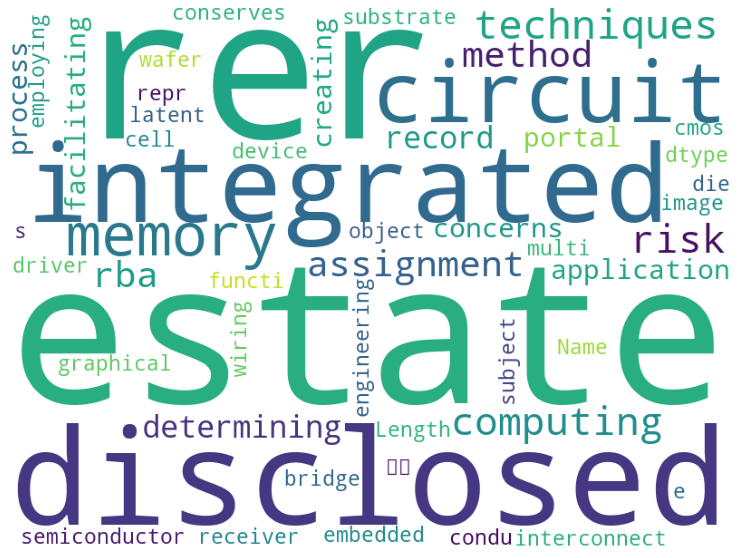

In [64]:
displayWordCloud(str(patent_desc_forw2v_two))

# Word Vectors


## Word2vec 학습 

In [65]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [66]:
#함수1
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(patent_desc_forw2v, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

In [67]:
# 함수2
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model2 = word2vec.Word2Vec(patent_desc_forw2v_two, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model2

### 유사도 단어 추출

In [68]:
model.wv.most_similar("transaction")

KeyError: ignored

In [ ]:
model.wv.most_similar("estate")

In [ ]:
model.wv.most_similar("sale")

In [ ]:
model.wv.most_similar("property")

#### 함수2
Lemmaziation 진행x

In [ ]:
model2.wv.most_similar("real")

In [ ]:
model2.wv.most_similar("transaction")

In [ ]:
model2.wv.most_similar("sale")

In [ ]:
model2.wv.most_similar("techniques")

In [ ]:
model2.wv.most_similar("computing")

### Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화

In [ ]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
#model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [ ]:
vocab = list(model2.wv.vocab)
X2 = model2[vocab]

print(len(X2))
print(X2[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X2_tsne = tsne.fit_transform(X2[:100,:])
# X_tsne = tsne.fit_transform(X)

In [ ]:
df2 = pd.DataFrame(X2_tsne, index=vocab[:100], columns=['x', 'y'])
df2.shape

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df2['x'], df2['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

# Topic Modeling

[토픽 모델링 참고(Wikidocs)](https://wikidocs.net/30708)

### TF-IDF

In [69]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [70]:
def detokenize_list( corpus ):
    # 1. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', corpus)
    # 2. 소문자 변환, 공백기준 쪼개기
    words = letters_only.lower().split()
    # 3. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords_list)
    # 4. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 5. 어간추출
    #lemm_words = [lm.lemmatize(w) for w in meaningful_words]
    # 6. pos tag ==NN 인것 반환 -> set 으로 처리하므로 빈도수 무시 // 나중에 TF-IDF 계산할 일 있으면 set 으로 처리한부분 바꾸기
    tagged_list = pos_tag((meaningful_words))
    nouns_list = [t[0] for t in tagged_list if t[1] == 'NN' or 'JJ']
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(nouns_list) )

In [71]:
detokenize_list(patent_desc[0])

'techniques computing risk assignment rba score valuation target property assigning appraiser perform valuation rba score techniques select appraisers mortgage loan default origination rba score numerical estimate level complexity valuation target property time level complexity valuation gauged valuation accuracy influenced level difficulty select comparable properties disclosed techniques comprise model configured assess complexity valuation property specific target property generated neighborhood property neighborhood target property techniques ensure complexity valuations assigned appraisers valuation tools identified highly accurate'

In [72]:
detokenized_doc = patent_desc.apply(detokenize_list)

In [73]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(detokenized_doc)

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (1673, 1000)


In [74]:
#topic 숫자 = n_components
svd_model = TruncatedSVD(n_components=6, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

6

In [75]:
np.shape(svd_model.components_)

(6, 1000)

In [76]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('property', 0.42601), ('data', 0.31111), ('user', 0.23326), ('method', 0.18266), ('device', 0.14888)]
Topic 2: [('property', 0.48758), ('buyer', 0.2456), ('seller', 0.19055), ('owner', 0.11469), ('buyers', 0.11294)]
Topic 3: [('data', 0.5807), ('property', 0.33127), ('valuation', 0.12719), ('subject', 0.1088), ('properties', 0.07993)]
Topic 4: [('property', 0.46963), ('user', 0.39259), ('device', 0.14208), ('mobile', 0.11213), ('interface', 0.09107)]
Topic 5: [('agent', 0.35539), ('data', 0.31355), ('buyer', 0.27949), ('listing', 0.18069), ('seller', 0.15357)]
Topic 6: [('device', 0.38156), ('sign', 0.27367), ('circuit', 0.18712), ('power', 0.14277), ('mobile', 0.13279)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### LDA

In [77]:
from gensim import corpora
dictionary = corpora.Dictionary(patent_desc_forw2v_two)
corpus = [dictionary.doc2bow(text) for text in patent_desc_forw2v_two]
print(corpus[0]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 4), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 6), (33, 3), (34, 1), (35, 3), (36, 2), (37, 1), (38, 4), (39, 4), (40, 1), (41, 1), (42, 7), (43, 1)]


In [78]:
print(dictionary[44])

calculating


In [79]:
len(dictionary)

8017

모델 훈련시키기

In [80]:
import gensim
NUM_TOPICS = 6 # 6개의 토픽, k=6
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.016*"estate" + 0.009*"virtual" + 0.008*"user" + 0.007*"method" + 0.006*"data" + 0.005*"device"')
(1, '0.043*"estate" + 0.033*"data" + 0.020*"property" + 0.008*"method" + 0.008*"device" + 0.006*"includes"')
(2, '0.038*"estate" + 0.027*"property" + 0.016*"agent" + 0.016*"method" + 0.015*"buyer" + 0.015*"transaction"')
(3, '0.030*"user" + 0.023*"property" + 0.021*"estate" + 0.013*"method" + 0.012*"data" + 0.012*"device"')
(4, '0.041*"estate" + 0.015*"user" + 0.013*"property" + 0.013*"data" + 0.011*"loan" + 0.011*"server"')
(5, '0.034*"estate" + 0.016*"data" + 0.015*"property" + 0.012*"method" + 0.009*"listing" + 0.007*"includes"')


In [81]:
print(ldamodel.print_topics(1))

[(0, '0.016*"estate" + 0.009*"virtual" + 0.008*"user" + 0.007*"method" + 0.006*"data" + 0.005*"device" + 0.004*"service" + 0.004*"investment" + 0.004*"antenna" + 0.004*"equity"')]


LDA 시각화

In [82]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 32.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f19a290303a2f3c1553e5431f75c4b6e74be53bc885001c36eeffcae0441a453
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [83]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# DTM(Countvectorizer)

In [103]:
import nltk
from nltk.tokenize import word_tokenize

In [113]:
# 함수 3 lemmization 생략 , NN 만 추출
def countvect( corpus ):
    # 1. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', corpus)
    # 2. 소문자 변환, 공백기준 쪼개기
    words = letters_only.lower().split()
    # 3. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords_list)
    # 4. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 5. pos tag ==NN  인것 반환  // 나중에 TF-IDF 계산할 일 있으면 set 으로 처리한부분 바꾸기
    tagged_list = pos_tag((meaningful_words))
    nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
    data = ' '.join(nouns_list)
    return data

In [114]:
cntvect = patent_desc.apply(countvect)

In [115]:
cntvect

0       risk assignment rba score valuation target pro...
1       method estate record rer rer estate resource m...
2                              application estate service
3       process representation development location pe...
4       multi die bridge emib substrate penultimate la...
                              ...                        
1671    circuit driver receiver circuit circuit circui...
1672    engineering wiring semiconductor device estate...
1673    memory cell image feature application memory s...
1674    wafer substrate material substrate interconnec...
1675    memory estate rom cell source drain region pro...
Name: 요약, Length: 1673, dtype: object

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
vect = CountVectorizer(ngram_range=(2, 2),stop_words = stopwords_list,tokenizer=nltk.word_tokenize, min_df=10).fit(cntvect)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'re", "'s", "'t", '.', 'herse', 'himse', 'i.e', 'itse', 'myse', "n't", 'sha', 'wo', '”'] not in stop_words.
  % sorted(inconsistent)


In [128]:
vocab = vect.vocabulary_
vocab

{'mortgage loan': 111,
 'property time': 152,
 'valuation property': 192,
 'property property': 146,
 'method estate': 105,
 'application estate': 7,
 'estate service': 79,
 'transaction management': 183,
 'user interface': 191,
 'property user': 154,
 'property estate': 134,
 'estate property': 73,
 'estate access': 43,
 'memory device': 100,
 'memory memory': 101,
 'estate circuit': 50,
 'circuit board': 18,
 'method device': 104,
 'time property': 179,
 'property location': 138,
 'database database': 27,
 'estate estate': 57,
 'estate transaction': 82,
 'property transaction': 153,
 'estate agent': 44,
 'estate asset': 46,
 'estate industry': 58,
 'estate management': 63,
 'method mortgage': 106,
 'mortgage estate': 110,
 'estate customer': 52,
 'plurality estate': 121,
 'estate user': 84,
 'interface device': 86,
 'communication network': 25,
 'communication estate': 24,
 'agent estate': 3,
 'agent agent': 1,
 'property price': 145,
 'seller estate': 168,
 'list property': 89,
 'pr

In [129]:
vect.fit_transform(cntvect).toarray()


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [143]:
word_list = list(vocab.keys())

In [144]:
word_list

['mortgage loan',
 'property time',
 'valuation property',
 'property property',
 'method estate',
 'application estate',
 'estate service',
 'transaction management',
 'user interface',
 'property user',
 'property estate',
 'estate property',
 'estate access',
 'memory device',
 'memory memory',
 'estate circuit',
 'circuit board',
 'method device',
 'time property',
 'property location',
 'database database',
 'estate estate',
 'estate transaction',
 'property transaction',
 'estate agent',
 'estate asset',
 'estate industry',
 'estate management',
 'method mortgage',
 'mortgage estate',
 'estate customer',
 'plurality estate',
 'estate user',
 'interface device',
 'communication network',
 'communication estate',
 'agent estate',
 'agent agent',
 'property price',
 'seller estate',
 'list property',
 'program estate',
 'program product',
 'estate plurality',
 'estate market',
 'interface user',
 'estate mortgage',
 'property listing',
 'loan application',
 'user estate',
 'property

##  Co-occurence matrix

참고: https://github.com/suhaskv/Matrix-Factorization-Python/blob/master/Word_Vectors/Co_occurence_matrix.ipynb

In [127]:
# Create a co-occurrence matrix of unique words and initialize them to zero
uniq_words = vect.get_feature_names()
n = len(uniq_words) #193개 unique words 
co_mat = np.zeros((n,n)) #초기 행렬: unique words 길이 만큼 0으로 채운다.
co_mat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
len(uniq_words)

193

In [145]:
window_len = 2
def update_co_mat(x):   
    # Get all the words in the sentence and store it in an array wrd_lst
    wrd_list = list(vocab.keys())
    
    # Consider each word as a focus word
    for focus_wrd_indx, focus_wrd in enumerate(wrd_list):
        focus_wrd = focus_wrd.lower()
        # Get the indices of all the context words for the given focus word
        for contxt_wrd_indx in range((max(0,focus_wrd_indx - window_len)),(min(len(wrd_list),focus_wrd_indx + window_len +1))):                        
            # If context words are in the unique words list
            if wrd_list[contxt_wrd_indx] in uniq_words:
                
                # To identify the row number, get the index of the focus_wrd in the uniq_words list
                co_mat_row_indx = uniq_words.index(focus_wrd)
                
                # To identify the column number, get the index of the context words in the uniq_words list
                co_mat_col_indx = uniq_words.index(wrd_list[contxt_wrd_indx])
                                
                # Update the respective columns of the corresponding focus word row
                co_mat[co_mat_row_indx][co_mat_col_indx] += 1

In [146]:
for word in cntvect:
    update_co_mat(word)
print()
print("Co-occurrence Matrix: ")
print(co_mat)


Co-occurrence Matrix: 
[[1673.    0.    0. ...    0.    0.    0.]
 [   0. 1673.    0. ...    0.    0.    0.]
 [   0.    0. 1673. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1673.    0.    0.]
 [   0.    0.    0. ...    0. 1673.    0.]
 [   0.    0.    0. ...    0.    0. 1673.]]


Text(0.5, 1.0, 'Co-occurrence Matrix')

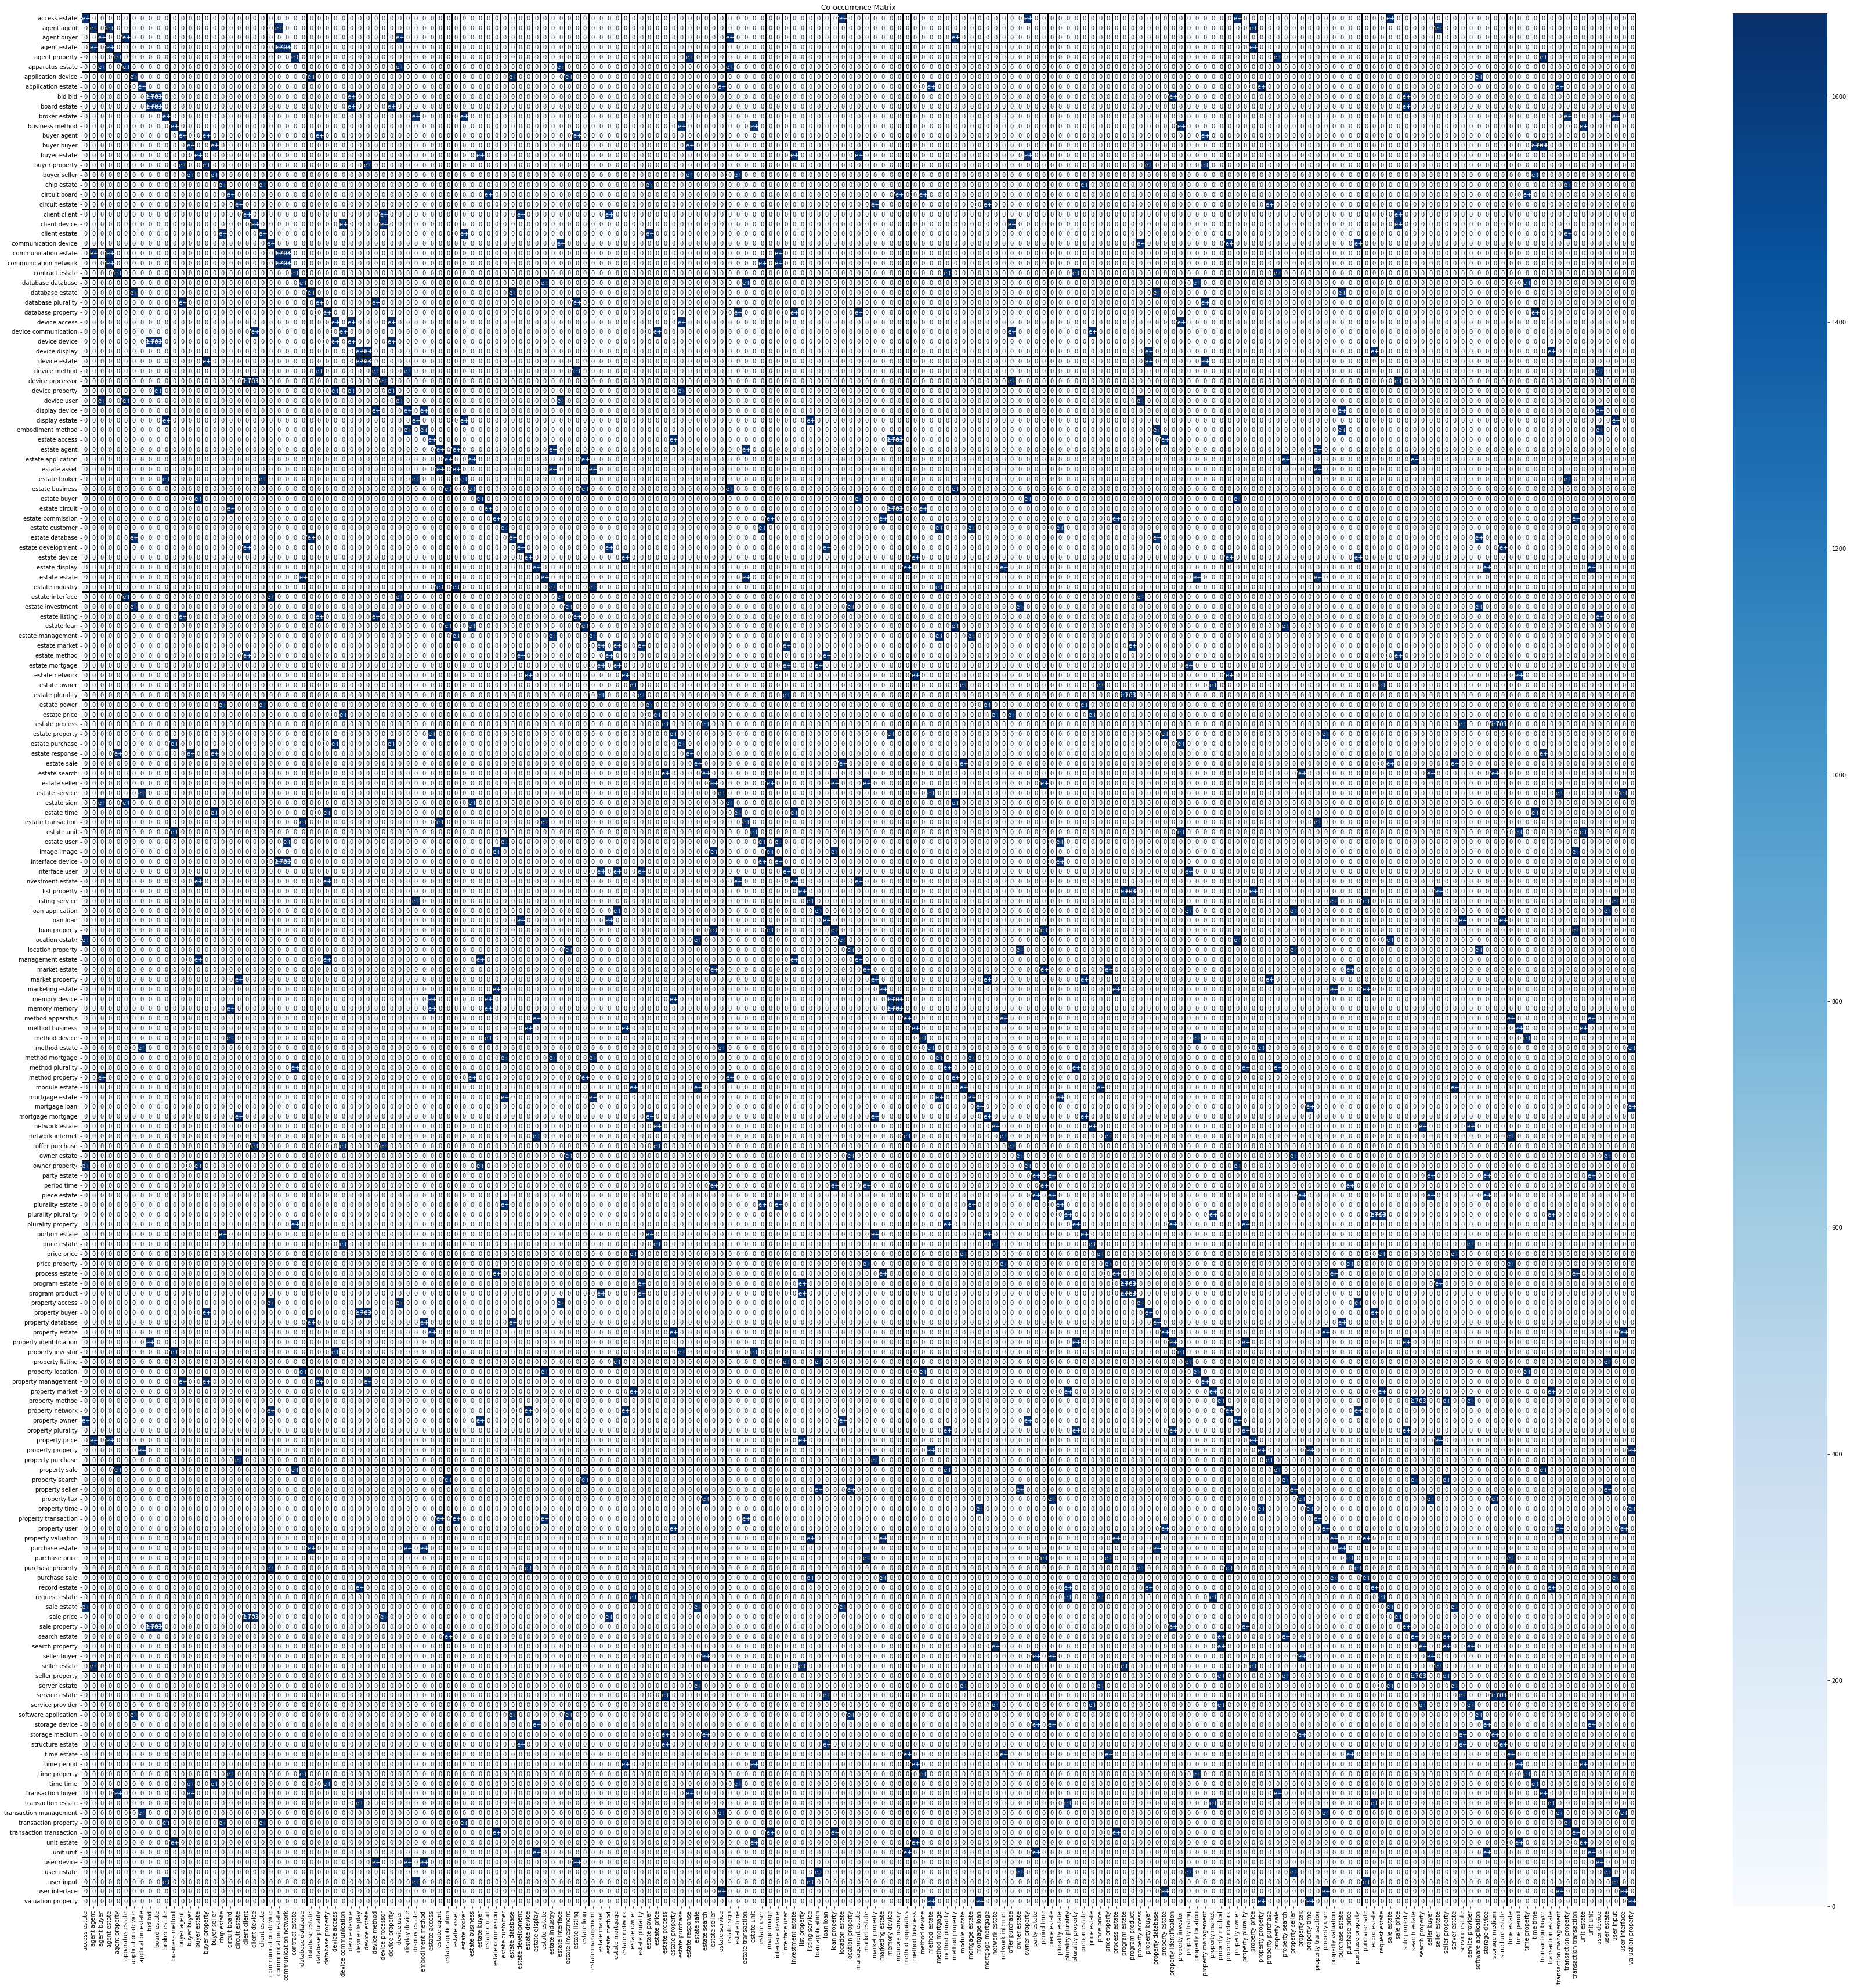

In [147]:
figure(figsize=(60,60))
df_cm1 = pd.DataFrame(co_mat, index=uniq_words, columns=uniq_words)
cf_hm1 = sns.heatmap(df_cm1, annot=True, xticklabels=uniq_words, yticklabels=uniq_words, linewidths=.5, linecolor='black', cmap="Blues")
plt.yticks(rotation=0)
plt.title('Co-occurrence Matrix')

In [148]:
plt.savefig("co-occurentce matrix.png")

<Figure size 432x288 with 0 Axes>